In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

pd.set_option('display.max_columns', 50)

In [5]:
df = pd.read_csv('../data/graph-dataset/semester-2/form-tabular/form_df_0.csv')

<Axes: >

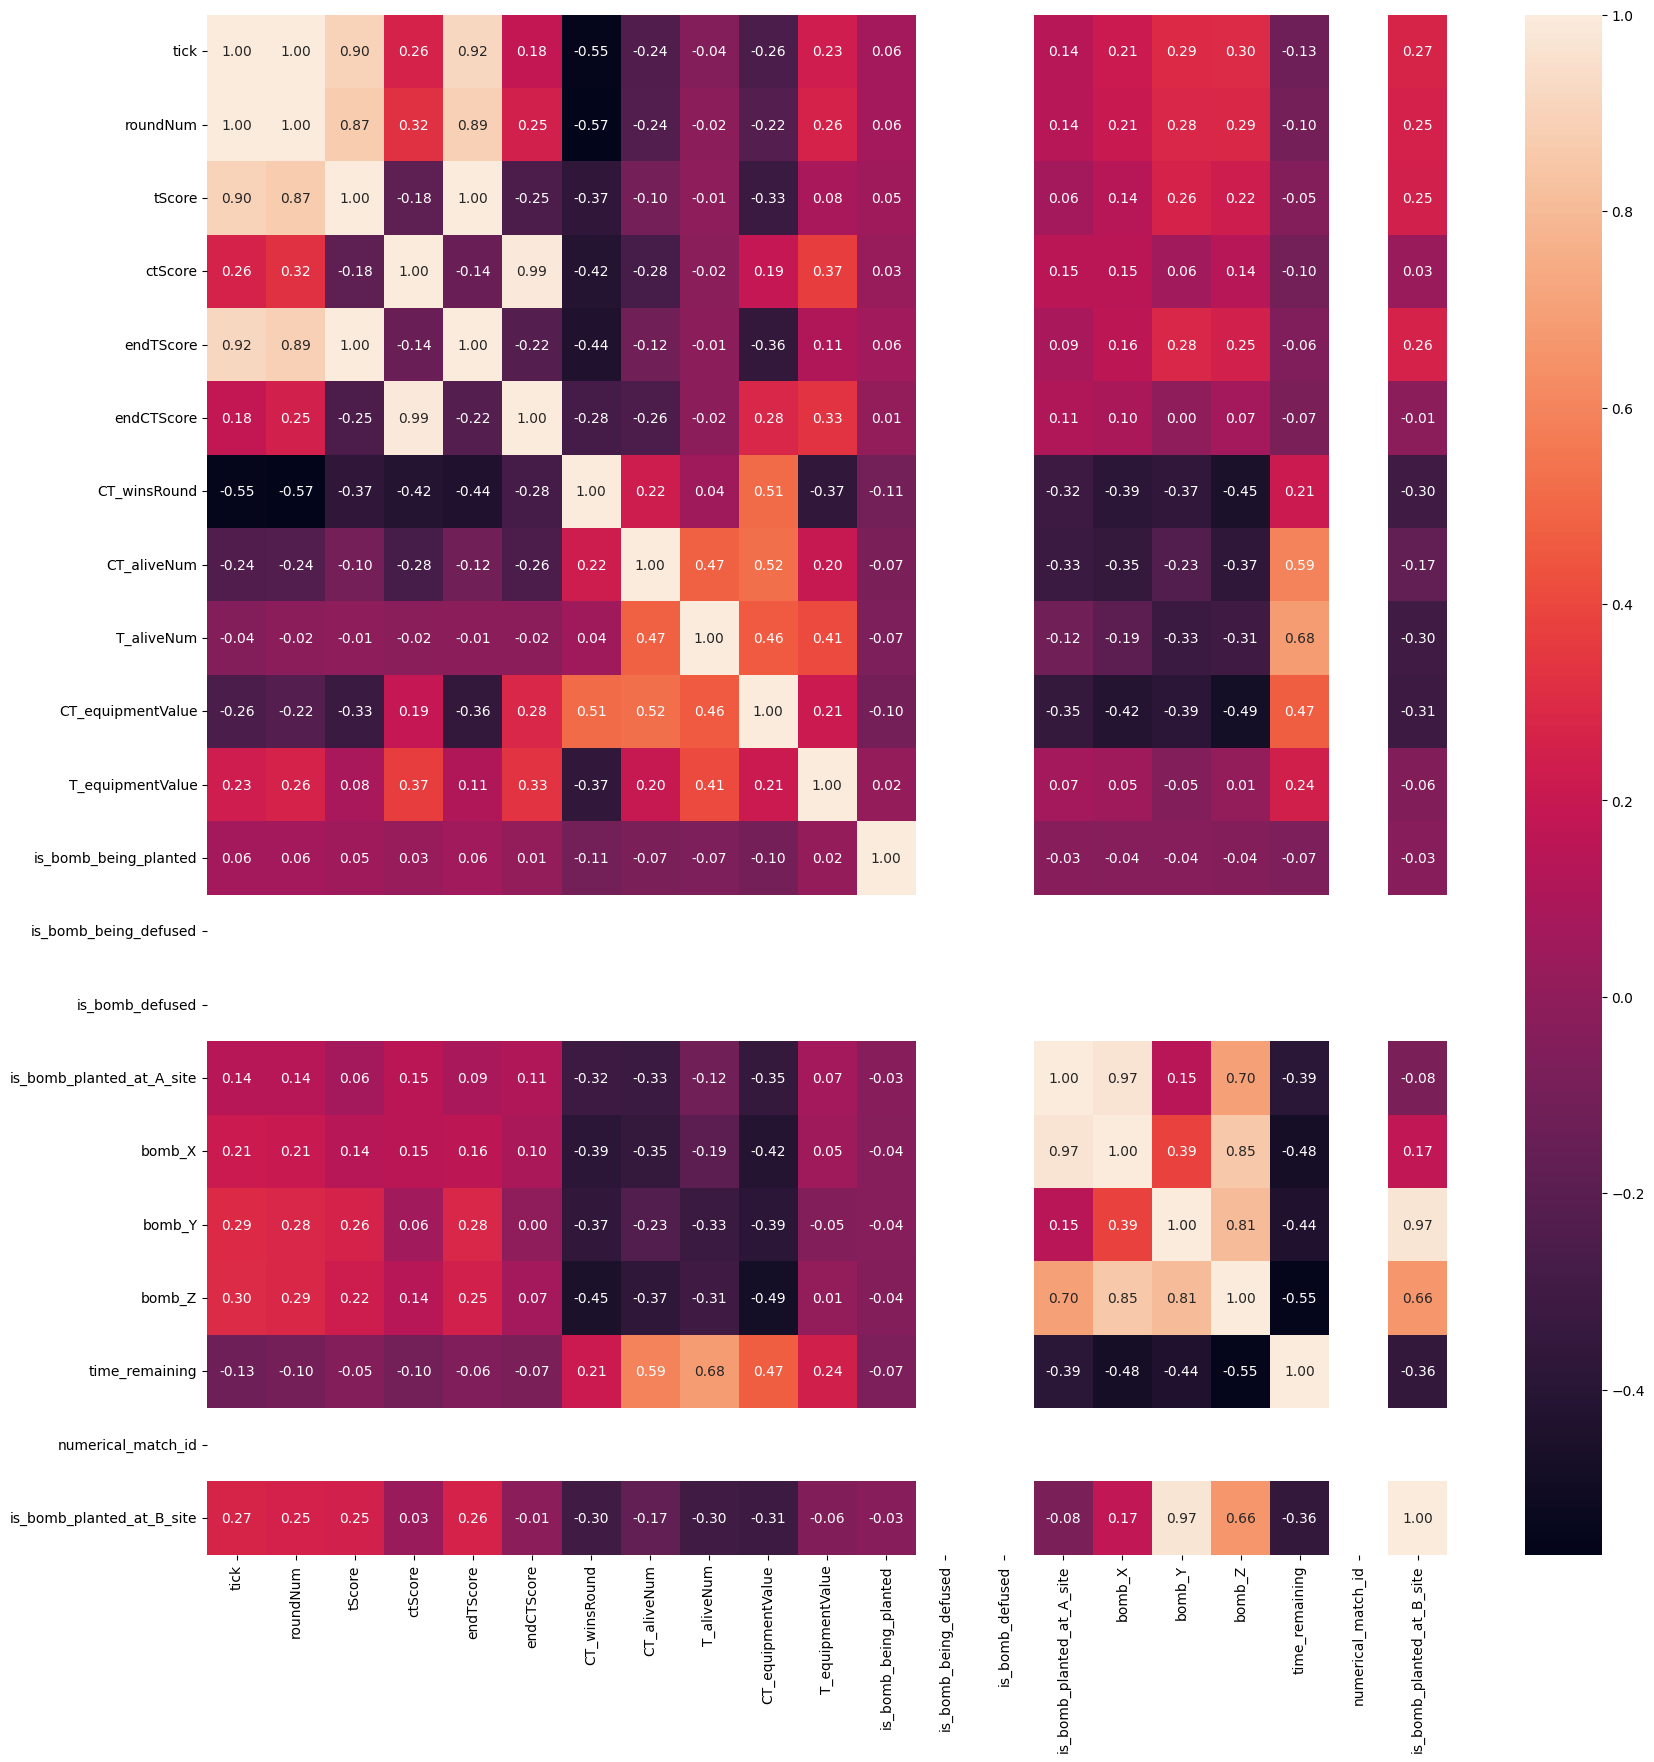

In [20]:
overall_columns = [col for col in df.columns if 'player' not in col]
overall_columns = [col for col in overall_columns if 'match_id' != col]
overall_columns = [col for col in overall_columns if 'bomb_mx_pos' not in col]
df = df[overall_columns]

plt.figure(figsize=(20, 20))
sns.heatmap(df.corr(), annot=True, fmt=".2f")